In [4]:
import pickle

# Load the newsgroups file
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

# Preview the data
print(type(newsgroup_data))
print(len(newsgroup_data))
print(newsgroup_data[:2])  # Preview first 2 docs


<class 'list'>
2000
["The best group to keep you informed is the Crohn's and Colitis Foundation\nof America.  I do not know if the UK has a similar organization.  The\naddress of\nthe CCFA is \n\nCCFA\n444 Park Avenue South\n11th Floor\nNew York, NY  10016-7374\nUSA\n\nThey have a lot of information available and have a number of newsletters.\n \nGood Luck.", '%>I dunno, Lemieux?  Hmmm...sounds like he\n%>has *French* blood in him!!!  Hey!  France is part of Europe!  Send that\n%>Euro-blooded boy back!!!\n%\n% Don\'t you Americans study history...the French settled in North America\n% as early or before the British...Lemieux can probably trace back his\n% North American heritage back a lot further than most of us.\n\n\n<friendly-jibe mode on>\n\nDon\'t you Canadians understand sarcasm?  Sometimes the reader must\ndecide that what he\'s reading is so ludicrous that it must mean\nthe opposite of what it said...\n\nKinda like the "Toronto\'s going to win the Cup" posts.  Yeah.  Right.\nAn

In [6]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab') # Download missing resource

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(doc):
    doc = re.sub(r'[^a-zA-Z]', ' ', doc.lower())
    tokens = word_tokenize(doc)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2])

cleaned_docs = [clean_text(doc) for doc in newsgroup_data]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF for NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(cleaned_docs)

# CountVectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
count = count_vectorizer.fit_transform(cleaned_docs)


In [8]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        weights = topic[topic.argsort()[:-n_top_words - 1:-1]]
        ax = axes[topic_idx]
        ax.barh(top_features, weights)
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot LDA top words
plot_top_words(lda_model, count_vectorizer.get_feature_names_out(), 10, 'LDA Topics')

# Plot NMF top words
plot_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10, 'NMF Topics')


NameError: name 'lda_model' is not defined

# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Train lda model

### Subtask:
Train an LDA model using the cleaned text data and the CountVectorizer output.


**Reasoning**:
Train an LDA model using the cleaned text data and the CountVectorizer output.



In [9]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(count)

LatentDirichletAllocation(random_state=42)

## Train nmf model

### Subtask:
Train an NMF model using the cleaned text data and the TfidfVectorizer output.


**Reasoning**:
Train an NMF model using the cleaned text data and the TfidfVectorizer output.



In [10]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=10, random_state=42, init='nndsvd')
nmf_model.fit(tfidf)

NMF(init='nndsvd', n_components=10, random_state=42)

## Plot lda top words

### Subtask:
Use the provided function to plot the top words for the trained LDA model.


**Reasoning**:
Call the plot_top_words function with the lda_model, count_vectorizer feature names, number of top words (10), and the title 'LDA Topics' as arguments.



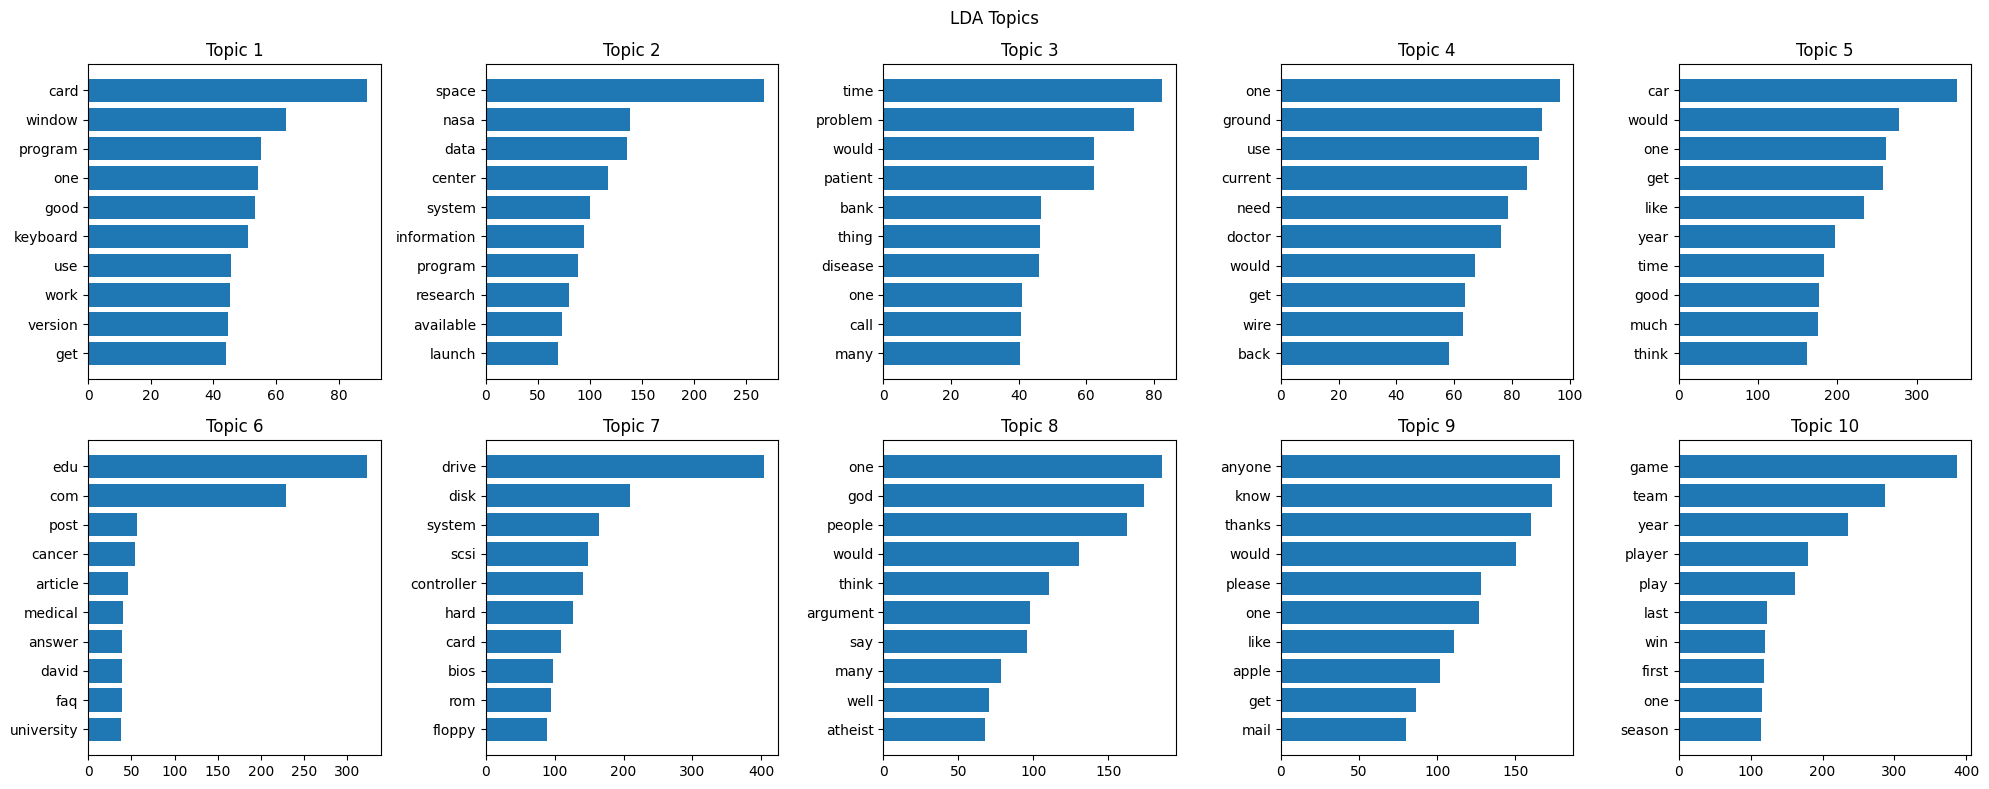

In [11]:
plot_top_words(lda_model, count_vectorizer.get_feature_names_out(), 10, 'LDA Topics')

## Plot nmf top words

### Subtask:
Use the provided function to plot the top words for the trained NMF model.


**Reasoning**:
Call the provided `plot_top_words` function with the NMF model, feature names, number of top words, and the specified title to visualize the top words for each NMF topic.



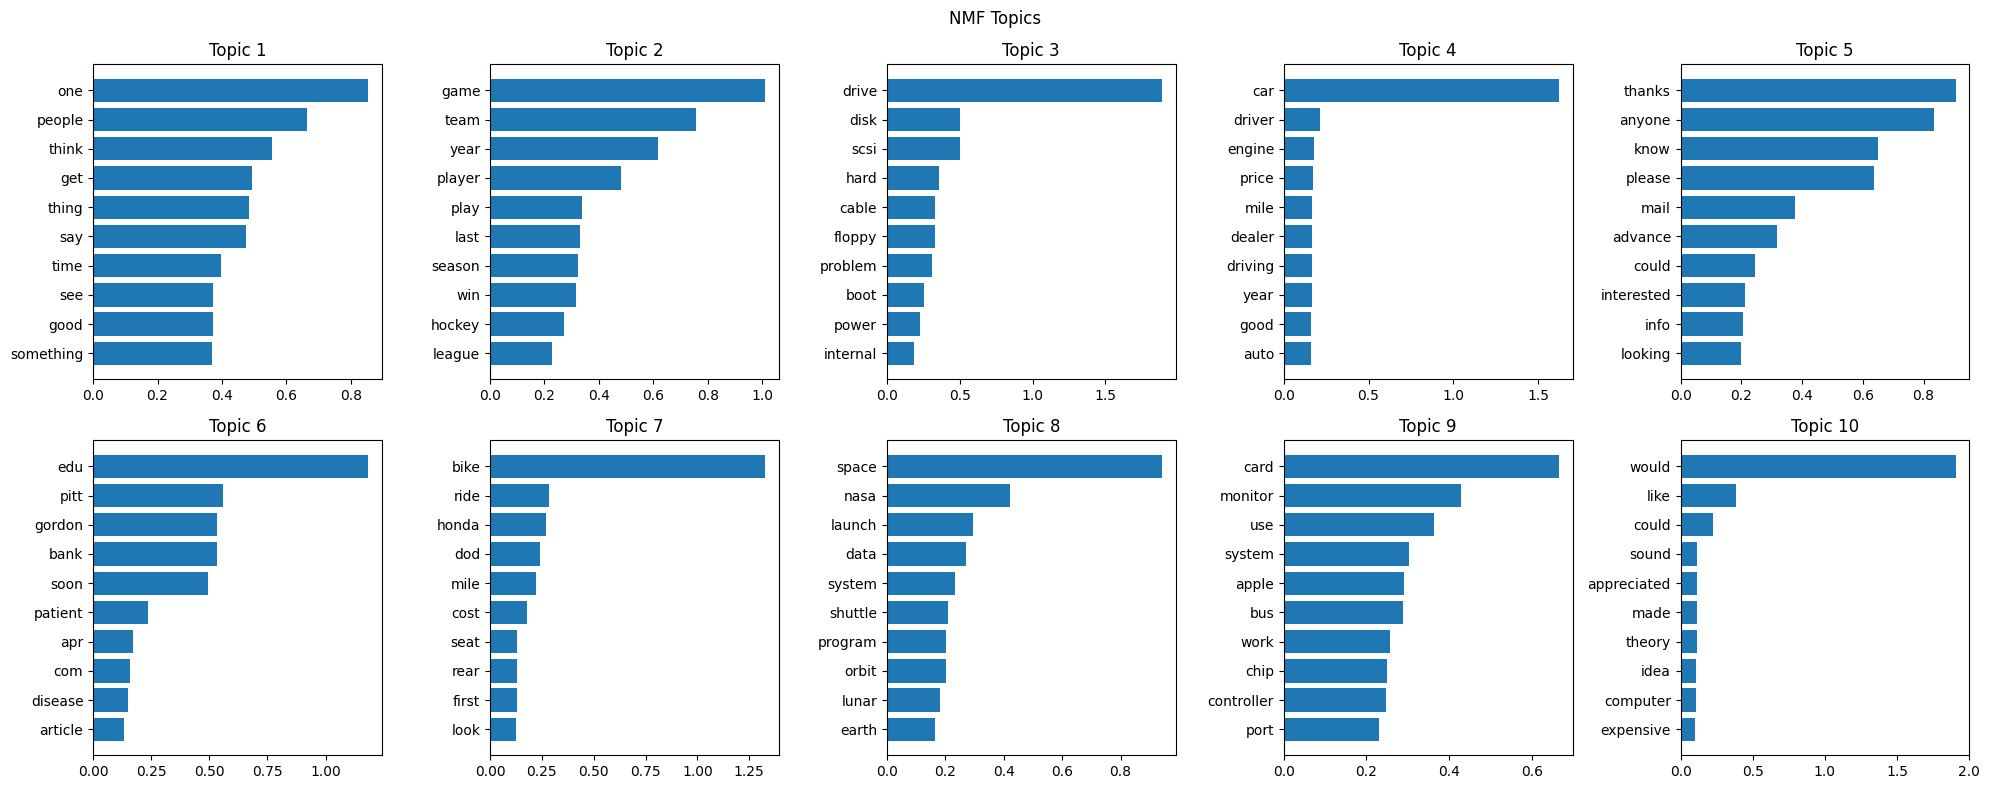

In [12]:
plot_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10, 'NMF Topics')

## Summary:

### Data Analysis Key Findings

*   LDA and NMF models were successfully trained on the text data using CountVectorizer and TfidfVectorizer outputs, respectively.
*   The `plot_top_words` function was successfully used to visualize the top 10 words for the topics generated by both the LDA and NMF models.
*   The plotting function generated matplotlib figures for both models, indicating successful execution without errors.

### Insights or Next Steps

*   Review the generated plots to interpret the topics identified by the LDA and NMF models and compare the coherence and distinctiveness of the topics from each method.


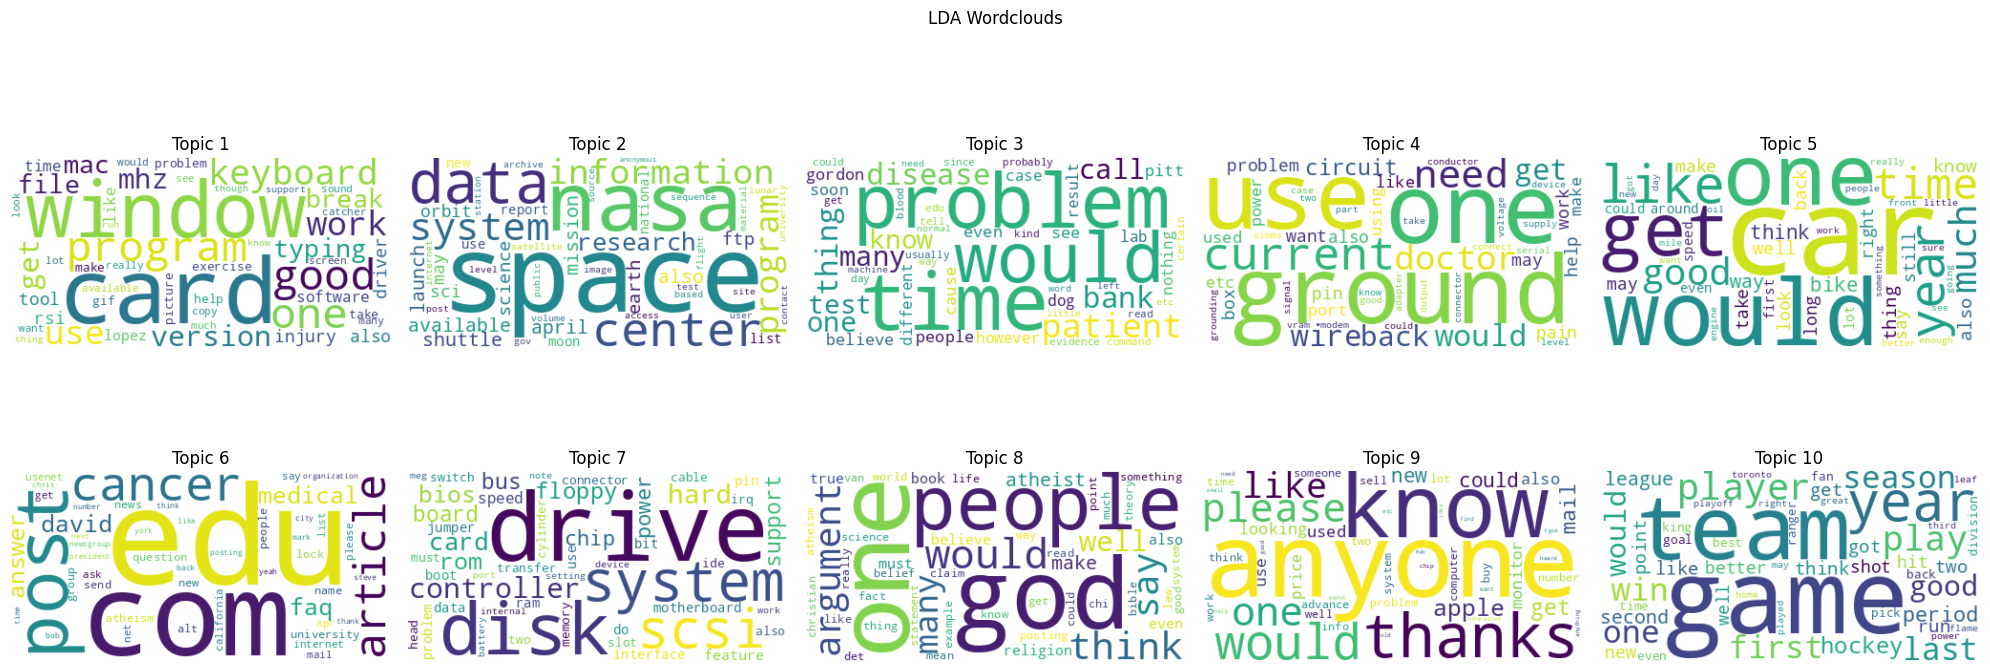

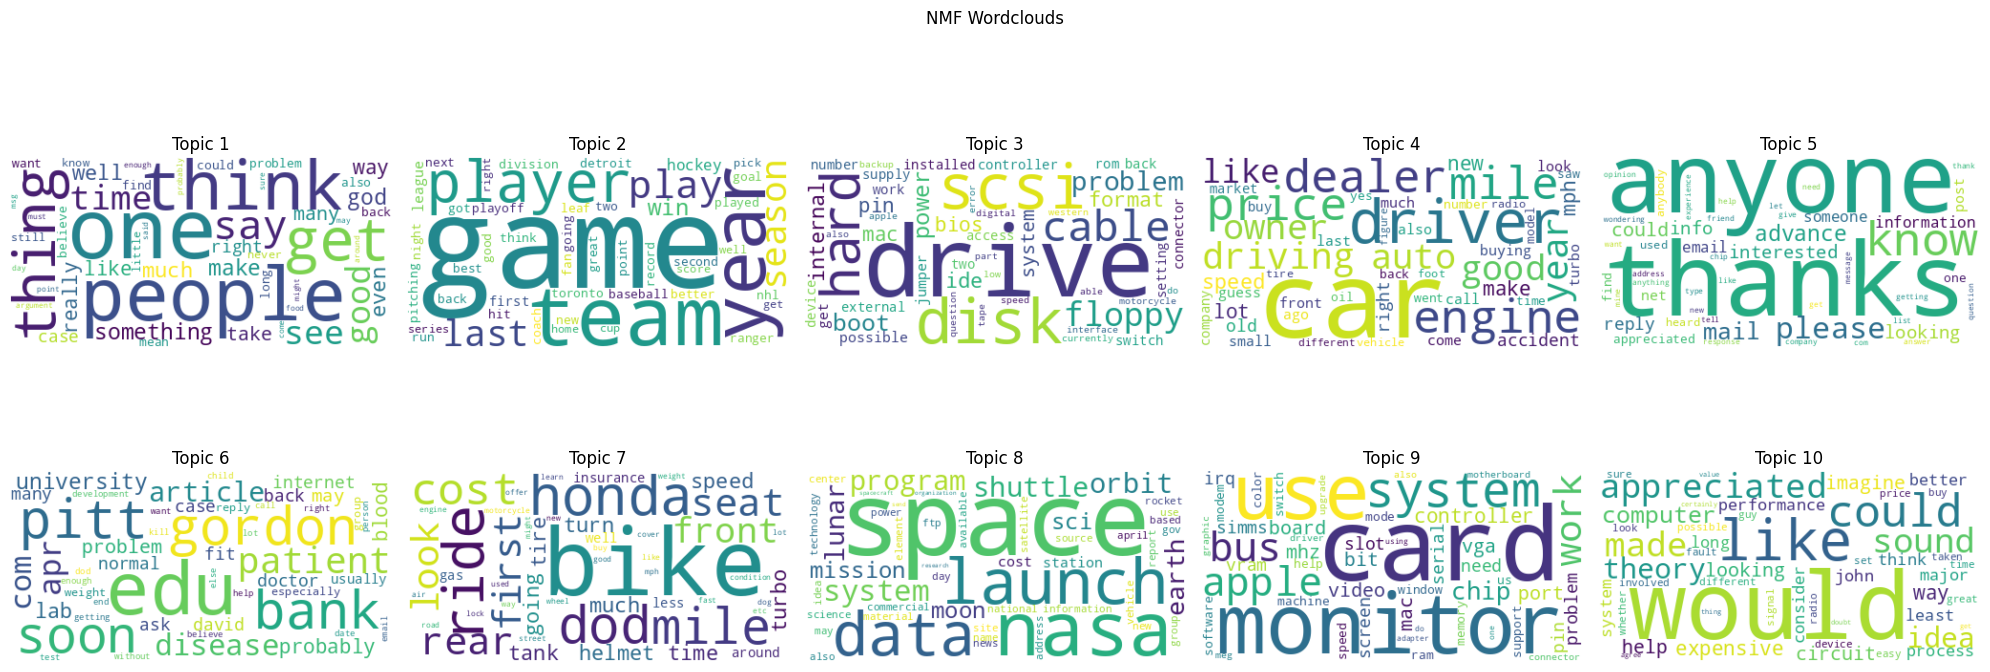

In [13]:
from wordcloud import WordCloud

def plot_wordclouds(model, feature_names, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-50:-1]}
        wordcloud = WordCloud(background_color='white').generate_from_frequencies(topic_words)
        axes[topic_idx].imshow(wordcloud, interpolation='bilinear')
        axes[topic_idx].axis('off')
        axes[topic_idx].set_title(f'Topic {topic_idx + 1}')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# LDA Wordclouds
plot_wordclouds(lda_model, count_vectorizer.get_feature_names_out(), 'LDA Wordclouds')

# NMF Wordclouds
plot_wordclouds(nmf_model, tfidf_vectorizer.get_feature_names_out(), 'NMF Wordclouds')
